In [1]:
%matplotlib notebook

from scipy import integrate
from matplotlib.legend_handler import HandlerLine2D

import numpy as np
import matplotlib.pyplot as plt
import cosmolopy.distance as cd
import cosmolopy.constants as cc


<IPython.core.display.Javascript object>


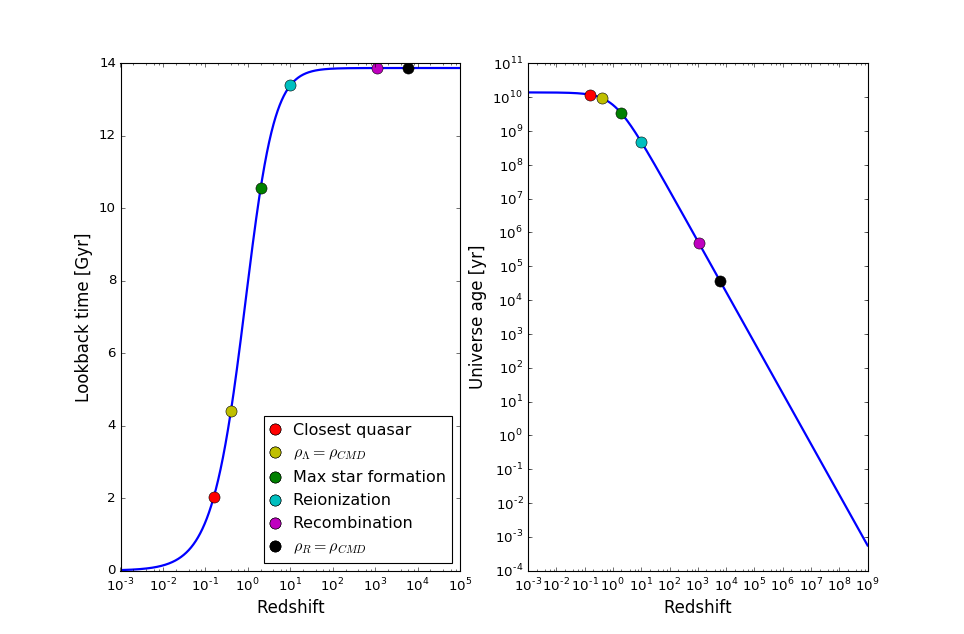

In [2]:
cosmo = {'omega_M_0' : 0.3, 'omega_lambda_0' : 0.7, 'h' : 0.68}
cosmo = cd.set_omega_k_0(cosmo) 


z = np.array([ 0.158,0.4,2,10,1100,6000])
t = cd.lookback_time(z, **cosmo)
age = cd.age(z, **cosmo)

colors = ['ro','yo','go','co','mo','ko']
labels = ['Closest quasar','$\\rho_{\\Lambda} = \\rho_{CMD}$',
          'Max star formation', 'Reionization','Recombination','$\\rho_{R} = \\rho_{CMD}$']

z_s = np.logspace(-3,5,2000)
t_s = cd.lookback_time(z_s, **cosmo)

plt.subplot(1,2,1)
plt.plot(z_s,t_s/cc.Gyr_s,'b-',lw=2)
for i in range(len(z)): plt.plot(z[i],t[i]/cc.Gyr_s,colors[i],
                                 markersize=10,label=labels[i])

plt.xscale('log')
plt.xlabel('Redshift',fontsize=15)
plt.ylabel('Lookback time [Gyr]',fontsize=15)
plt.legend(loc='lower right',handlelength=0.58)

z_s2 = np.logspace(-3,9,2000)
t_s2 = cd.age(z_s2, **cosmo)

plt.subplot(1,2,2)
plt.plot(z_s2,t_s2/cc.yr_s,'b-',lw=2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Redshift',fontsize=15)
plt.ylabel('Universe age [yr]',fontsize=15)
for i in range(len(z)): plt.plot(z[i],age[i]/cc.yr_s,colors[i],
                                 markersize=10)


In [3]:
data = np.vstack([z,t/cc.yr_s,age/cc.yr_s])
np.set_printoptions(precision=5)
print('   redshift    t_back [yr] t_forward [yr]\n')
print(data.T)
print(' ')
print('t_max = %1.3e [yr]' % (t_s2[0]/cc.yr_s))

   redshift    t_back [yr] t_forward [yr]

[[  1.58000e-01   2.03558e+09   1.18370e+10]
 [  4.00000e-01   4.41083e+09   9.46175e+09]
 [  2.00000e+00   1.05488e+10   3.32381e+09]
 [  1.00000e+01   1.33927e+10   4.79919e+08]
 [  1.10000e+03   1.38721e+10   4.79405e+05]
 [  6.00000e+03   1.38725e+10   3.76746e+04]]
 
t_max = 1.386e+10 [yr]
